<a href="https://colab.research.google.com/github/Saili-Myana/ML-Learning-Projects/blob/master/Covid_stats_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url1="https://raw.githubusercontent.com/Saili-Myana/Covid19-data/master/c2c.csv"

In [ ]:
url2="https://raw.githubusercontent.com/Saili-Myana/Covid19-data/master/time_series_2019-ncov-Confirmed.csv"

In [ ]:
data = pd.read_csv(url2)

In [ ]:
data=data.drop(columns=['Lat','Long'])
data

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,02-01-2020,02-02-2020,02-03-2020,02-04-2020,02-05-2020,02-06-2020,02-07-2020,02-08-2020,02-09-2020,02-10-2020,02-11-2020,02-12-2020,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,03-01-2020,03-02-2020,03-03-2020,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
r,c=data.shape
print(r) #no. of rows
print(c) #no.of columns

487
63


In [ ]:
list=[]
for col in range(2,c):
    count=0
    for i in range(r):
        if np.array(data.iloc[:,col])[i]==0:
            count+=1 #Counting no.of zeros in each column
    #print(count)
    if count>0.7*r:
        #print(count)
        list.append(col) #list with columns that have more than 70% zeros 
print(list)
#data[i]
data.columns[43]
#for i in range(len(list)):
data=data.drop(columns=data.columns[list]) # Dropping columns that have more than 70% zeros


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]


In [ ]:
data.shape

(487, 21)

In [ ]:
data

,Province/State,Country/Region,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
countries=np.array(data[['Country/Region']]) #All the counties
countries

array([['Thailand'],
       ['Japan'],
       ['Singapore'],
       ['Nepal'],
       ['Malaysia'],
       ['Canada'],
       ['Australia'],
       ['Australia'],
       ['Australia'],
       ['Cambodia'],
       ['Sri Lanka'],
       ['Germany'],
       ['Finland'],
       ['United Arab Emirates'],
       ['Philippines'],
       ['India'],
       ['Italy'],
       ['Sweden'],
       ['Spain'],
       ['Australia'],
       ['Belgium'],
       ['Egypt'],
       ['Australia'],
       ['Lebanon'],
       ['Iraq'],
       ['Oman'],
       ['Afghanistan'],
       ['Bahrain'],
       ['Kuwait'],
       ['Algeria'],
       ['Croatia'],
       ['Switzerland'],
       ['Austria'],
       ['Israel'],
       ['Pakistan'],
       ['Brazil'],
       ['Georgia'],
       ['Greece'],
       ['North Macedonia'],
       ['Norway'],
       ['Romania'],
       ['Estonia'],
       ['San Marino'],
       ['Belarus'],
       ['Iceland'],
       ['Lithuania'],
       ['Mexico'],
       ['New Zealand'],
      

In [ ]:
unique=np.array(data['Country/Region'].unique()) #only unique countries
unique

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

In [ ]:
cases=np.array(data['3/22/20']) #all the cases in the last column

In [ ]:
cases

array([  599,  1086,   455,     2,  1306,   424,   533,   296,   221,
          84,    82, 24873,   626,   153,   380,   396, 59138,  1934,
       28768,   100,  3401,   327,     0,   248,   233,    55,    40,
         332,   188,   201,   254,  7245,  3244,  1071,   776,  1593,
          54,   624,   114,  2383,   433,   326,   160,    76,   568,
         131,   251,    66,    30,   120,   906,   798,    23,   494,
         789,    65,   194,   202,   514,  1600,   113,    22,   139,
         115,   511,    67,   225,   632,   112,    73,   131,     3,
          37,   634,    75,   126,   414,   274,     2,    40,   231,
         134,   363,   222,   185,    16,    90,    37,   187,    13,
          27,    22,   425,   259,   219,    89,    95,    88,  1996,
       15793,  1642,   646,    49,    30,   600,   476,   830,  1914,
         161,   627,  1049,   509,    90,   244,   302,   196,   505,
         221,   152,   201,    99,   102,   190,    65,   169,    51,
         355,    83,

In [ ]:
cases2=[]
cases3=[]
con3=[]
for u in unique:
    temp=0
    for con in range(len(countries)):
        if u==countries[con]:
            temp+= cases[con]  #Counting cases in unique countries
    if temp>1000:
        cases3.append(temp)  #list of cases in countries that have mare than 1000 cases
        con3.append(u)     #list of country names that have more than 1000 cases
    cases2.append(temp)  #list of cases in unique countries
            
            

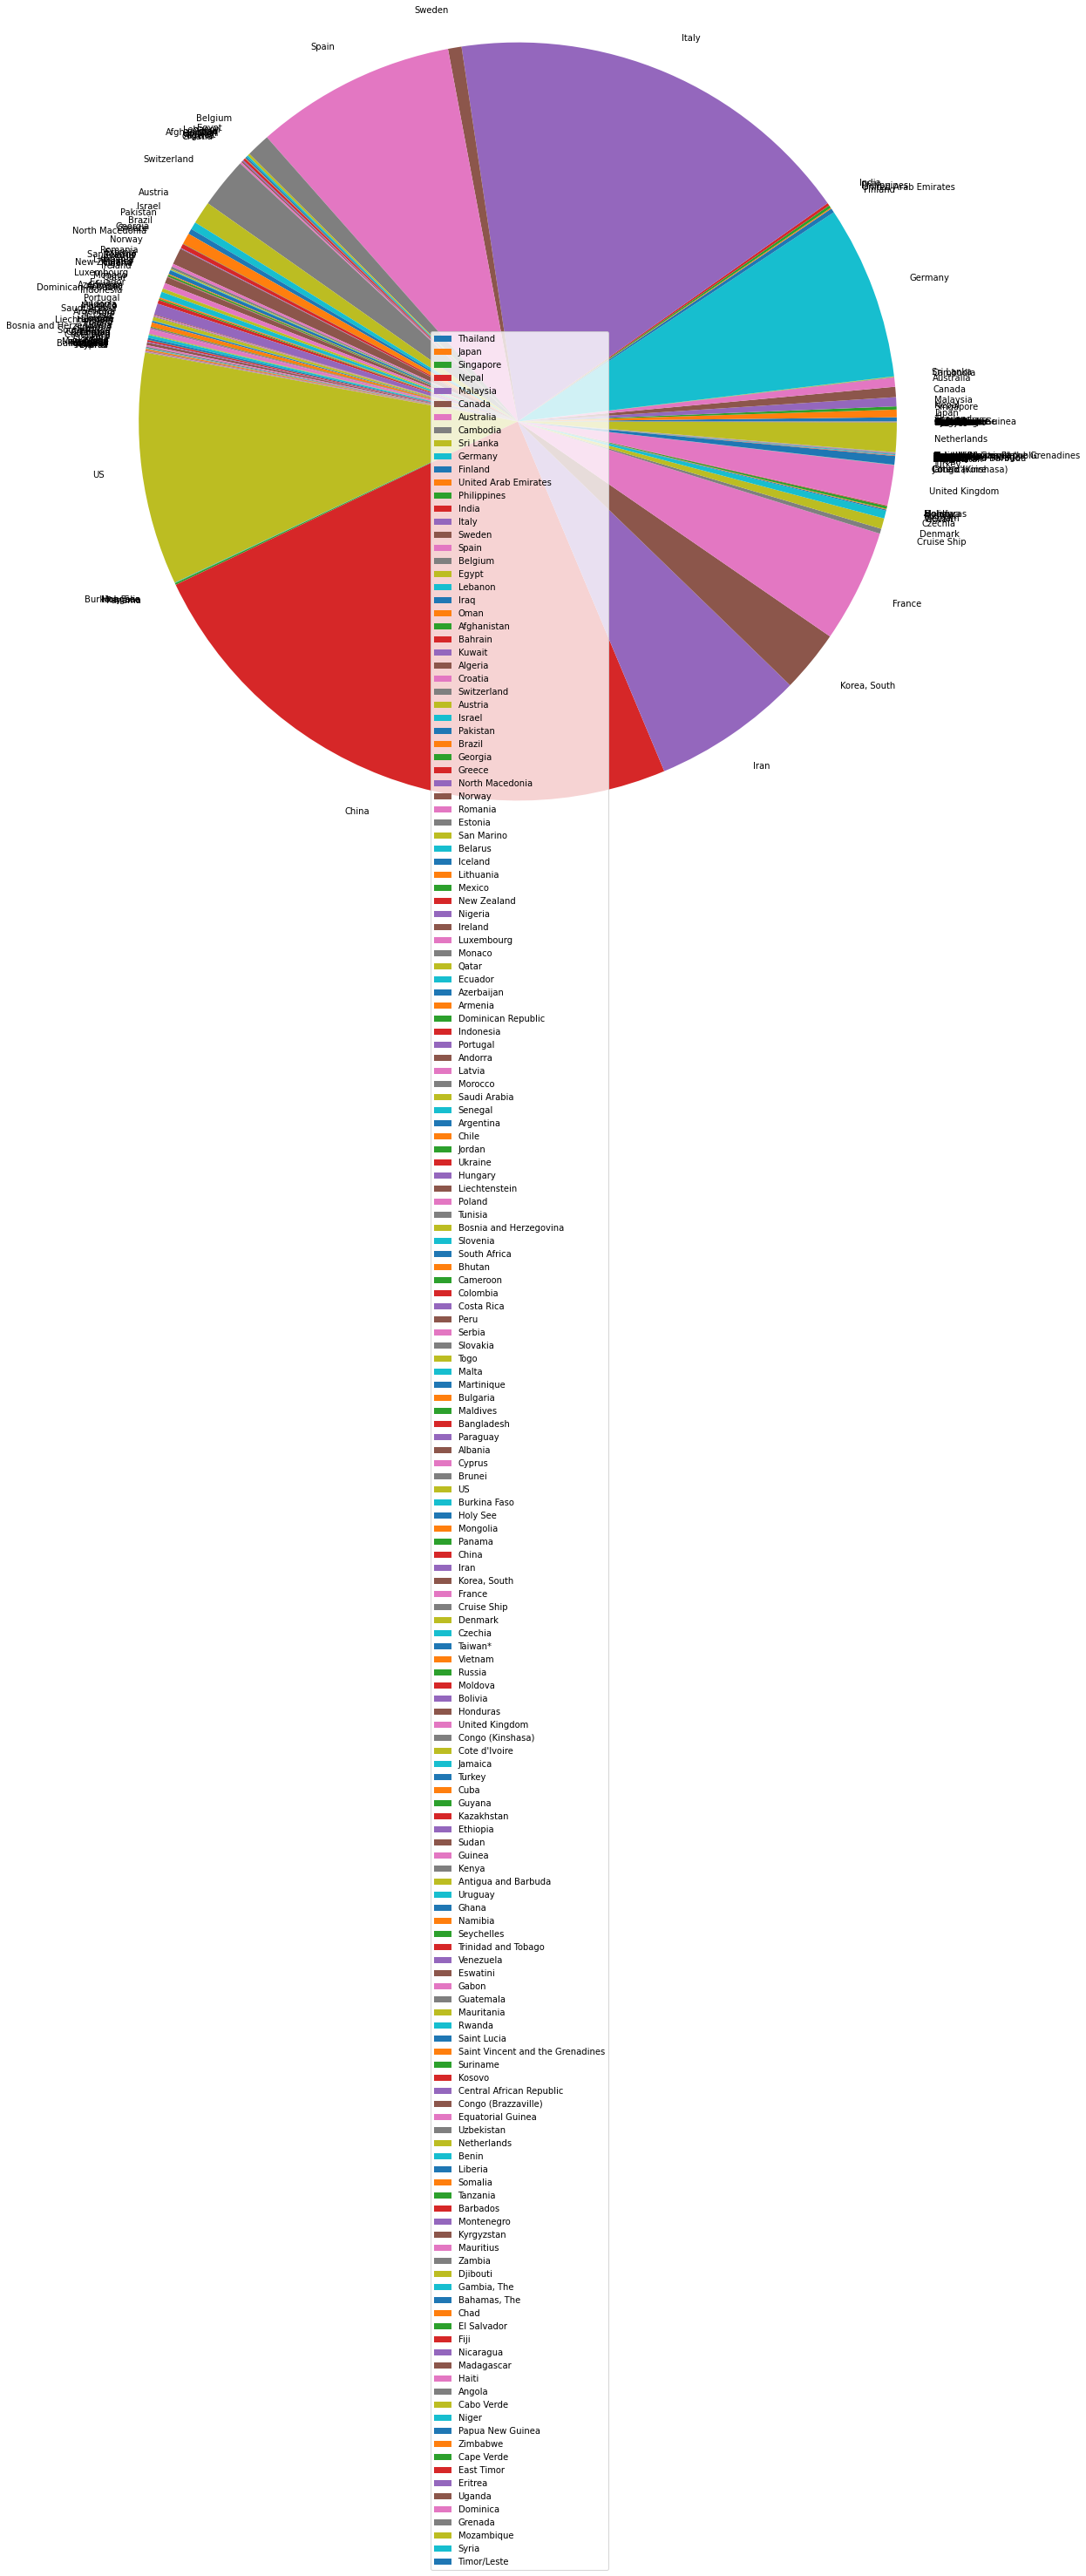

In [ ]:
#Plotting for all unique countries, this is not that useful, as we cant make out the differences!
plt.pie(cases2,labels=unique,radius=5)
plt.legend(loc='upper right')
plt.show()

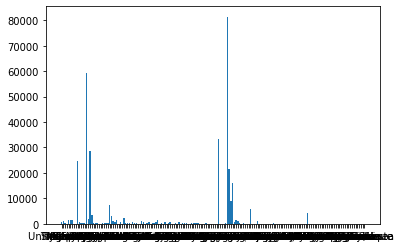

In [ ]:
#Bar plot for all countries, not that useful, cant read x-axis
plt.bar(unique,cases2)
plt.show()

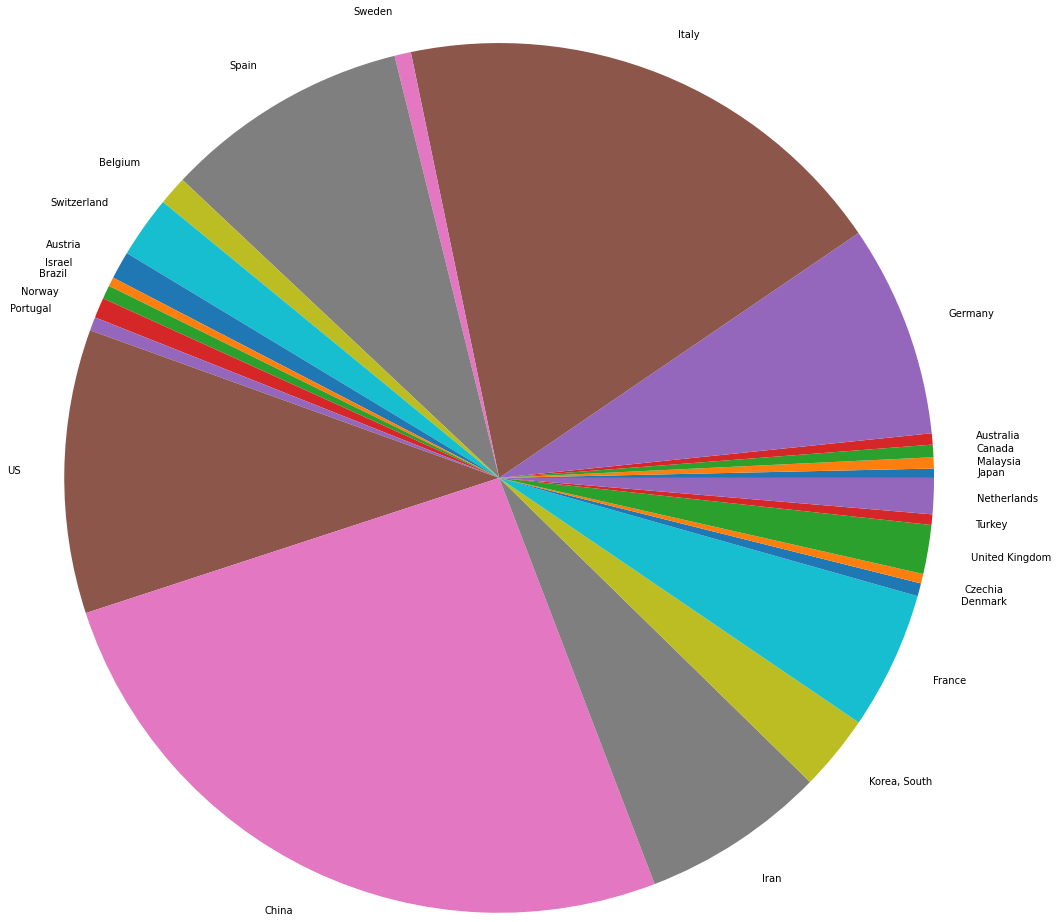

In [ ]:
#Pie chart of cases in countries with more than 1000 cases
plt.pie(cases3,labels=con3,radius=5)
plt.show()

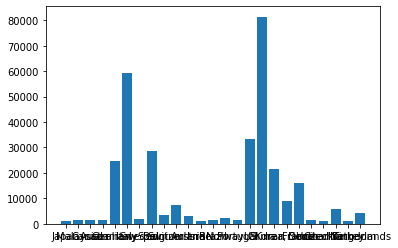

In [ ]:
# bar plot for cases>1000, not clear x-axis
plt.bar(con3,cases3)
plt.show()

In [ ]:
data

,Province/State,Country/Region,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
print(data.sum(axis = 0, skipna = True))
print(data.columns)

Country/Region    ThailandJapanSingaporeNepalMalaysiaCanadaAustr...
03-04-2020                                                    95120
03-05-2020                                                    97882
03-06-2020                                                   101784
03-07-2020                                                   105821
03-08-2020                                                   109795
03-09-2020                                                   113561
03-10-2020                                                   118592
03-11-2020                                                   125865
03-12-2020                                                   128343
3/13/20                                                      145193
3/14/20                                                      156094
3/15/20                                                      167446
3/16/20                                                      181527
3/17/20                                         

In [ ]:
np.array(data.sum(axis = 0, skipna = True))[1:]

array([95120, 97882, 101784, 105821, 109795, 113561, 118592, 125865,
       128343, 145193, 156094, 167446, 181527, 197142, 214910, 242708,
       272166, 304524, 335955], dtype=object)

In [ ]:
len(data.columns[2:])

19

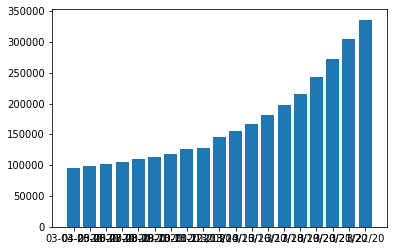

In [ ]:
# Plotting cases in all countries, for a particular data
plt.bar(data.columns[2:],np.array(data.sum(axis = 0, skipna = True))[1:])
plt.show()

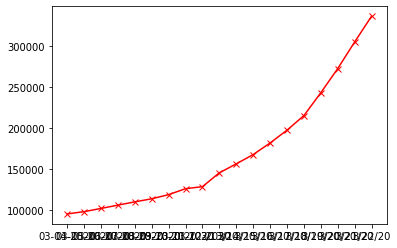

In [ ]:
# Plotting cases in all countries, for a particular data
plt.plot(data.columns[2:],np.array(data.sum(axis = 0, skipna = True))[1:],'r',marker='x')
plt.show()

In [ ]:
np.array(data.columns[2:])

array(['03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020',
       '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020',
       '03-12-2020', '3/13/20', '3/14/20', '3/15/20', '3/16/20',
       '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype=object)

In [ ]:
file2=pd.read_csv(url1)

In [ ]:
file2

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
189,South America,Paraguay
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay


In [ ]:
#list of all unique continents
ucont=np.array(file2['Continent'].unique())

In [ ]:
ucont

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

In [ ]:
#list of countries corresponding to continents
country=np.array(file2['Country'])

In [ ]:
conti=np.array(file2['Continent']) #all continents
conti

array(['Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa',
       'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa',
       'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa',
       'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa',
       'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa',
       'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa',
       'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa',
       'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa',
       'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Asia',
       'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia',
       'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia',
       'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia',
       'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia',
       'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia',
       'Asia', 'Asia', 'Asia', 'Eu

In [ ]:
count4=[0]*len(ucont)
count4 #variable list to store total cases in each continent

[0, 0, 0, 0, 0, 0]

In [ ]:
for var in range(len(unique)):
    for nc in range(len(country)):
        if unique[var]==country[nc]:
            for i in range(len(ucont)):
                if conti[nc]==ucont[i]:
                    count4[i]+=cases2[var]

In [ ]:
count4

[1015, 113013, 162094, 35349, 1316, 4096]

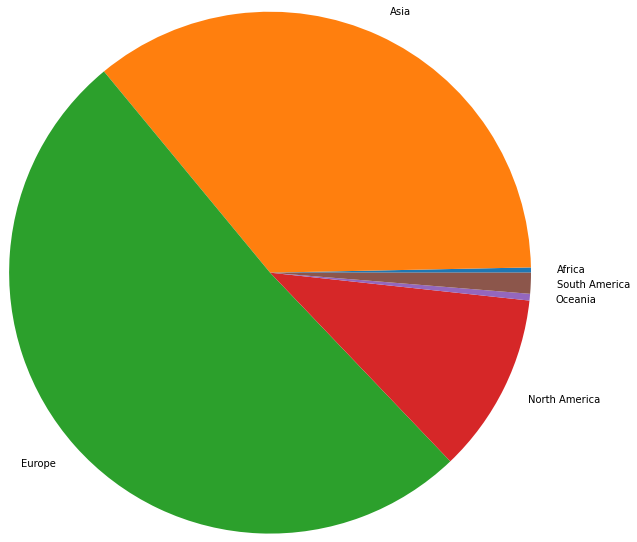

In [ ]:
#Pie Plot of total cases per continent
plt.pie(count4,labels=ucont,radius=3)
plt.show()

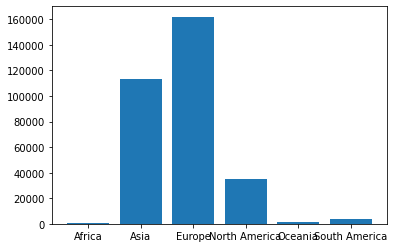

In [ ]:
#Bar Plot of total cases per continent
plt.bar(ucont,count4)
plt.show()